

```
# This is formatted as code
```

# **Installing Codecarbon From PyPi repository**
* ## see [docs](https://mlco2.github.io/codecarbon/installation.html) for further details

In [ ]:
!pip install codecarbon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.9/494.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.7 MB/s eta 0:00:00


# **Tracking the $CO_2$ emissions**
 * ## It supports both online (with internet access) and offline (without internet access) modes
 * ## The object ```EmissionsTracker``` is used for online tracking
 * ## The object ```OfflineEmissionsTracker``` instead for offline traking
    * ### in this case a ```country_iso_code``` parameter must be specified
    * ### It orresponds to the 3-letter alphabet ISO Code of the country where the compute infrastructure is hosted
    * ### Needed to fetch Carbon Intensity details of the regional electricity used
    * ### See [here](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes) for a complete list of country ISO codes
>> #### ```from codecarbon import OfflineEmissionsTracker```
>> #### ```tracker = OfflineEmissionsTracker(country_iso_code="ITA")```    

# Once intanstiated the OfflineEmissionTracker, it already provides for us info about:
 * ## The operative system platform
 * ## The Ptython and CodeCarbon version
 * ## The avaialble RAM, CPU and GPU count, and the relative type

# To start the tracker we need to run the ```start()``` method, ```stop()``` instead to end the tracking
>> #### ```tracker.start()```
>>> #HERE THE CODE TO TRACK
>> #### ```tracker.stop()```

# Some configurations are available to track only some device consumption (see docs)

# **EXAMPLE**
## Train a Deep Learning model on MNIST Data to recognize digits in images using TensorFlow Keras

In [ ]:
import sys
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
np.random.seed(42)  # for reproducibility
tf.random.set_seed(42)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train.shape:{X_train.shape}, X_train type :{type(X_train)}")
print(f"X_test.shape:{X_test.shape}, X_test type :{type(X_test)}")
num_classes = len(np.unique(y_train))
print(f"Number of classes classes:{num_classes}")

11490434/11490434 [==============================] - 1s 0us/step
X_train.shape:(60000, 28, 28), X_train type :<class 'numpy.ndarray'>
X_test.shape:(10000, 28, 28), X_test type :<class 'numpy.ndarray'>
Number of classes classes:10


# We have 60000 samples in our training set belonging to 10 classes
 * ### The images are 28 pixels x 28 pixels each


In [ ]:
# Normalizing in [0,1]
X_train = X_train/255.0
X_test = X_test/255.0

# Keras models accept three types of inputs:
 * ### **NumPy arrays**, just like Scikit-Learn
 * ### **TensorFlow Dataset objects**
 * ### **Python generators** that yield batches of data

# Let's build a MLP in Keras
 * ## ```Sequential``` represent the feed-forward models, ```Dense``` a fully-connected layer

# MLP takes vectors as inputs
# How to make images into MLP input?
  * ### Simply, we vectorize them using the `reshape()` method

In [ ]:
# reshaping all the training, testing dataset, by removing one dimension
X_train = X_train.reshape(-1, 28*28)
print(f"X_train.shape:{X_train.shape}")
X_test = X_test.reshape(-1, 28*28)
# keras models need float32 inputs
print(f"X_train.dtype:{X_train.dtype}")
X_train = X_train.astype('float32')
print(f"X_train.dtype:{X_train.dtype}")
X_test = X_test.astype('float32')

X_train.shape:(60000, 784)
X_train.dtype:float64
X_train.dtype:float32


# **CREATING THE MODEL**

In [ ]:
# hidden_units, list of integeres, where hidden_units[i] is the number of units
#  to use in the i-th hidden FC layer
def build_model(hidden_units):
    if len(hidden_units)<=1:
        sys.exit("At least one hidden layer is necessary. len(hidden_units) must be greater that 0")
    model = Sequential()
    model.add(Dense(hidden_units[0], input_shape=(28*28,), activation='sigmoid'))
    for i in range(1,len(hidden_units)):
        model.add(Dense(hidden_units[i], activation='sigmoid'))

    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    print(f"model.count_params(): {model.count_params()}")
    # compiling the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), # type of gradient descent procedure
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

# **Fitting models and estimate the carbon footprint**
*  ## For just for a few epochs as an example
*  ## Testing models of different complexity to evalaute the tradeoff accuracy/emissions
*  ## The tracker object returns just the total amount of emissions
   * ### however, the package has an in-built logger that logs data into a CSV file named ```emissions.csv``` in the output_dir, provided as an input parameter (defaults to the current directory), for each experiment tracked across projects
   * ### The data stored are the following: timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,
   >> ###  gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,country_name,country_iso_code,region,
   >> ###  cloud_provider,cloud_region,os,python_version,codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,
   >> ###  longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue


In [ ]:
from sklearn.metrics import accuracy_score
from codecarbon import EmissionsTracker

emissions = []
accuracy = []
# from less to more complex configs
configs = [
   [16, 16],
   [32, 32],
   [64, 64],
   [128, 32, 16],
   [128, 64, 32],
   [256, 64, 32, 16],
   [256, 128, 64, 32]
]
batch_size = 256
epochs = 100
for conf in configs:
    model = build_model(conf)
    tracker = EmissionsTracker()
    tracker.start()
    model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size = batch_size,
                        verbose = 0)



    pred = np.argmax(model.predict(X_test), axis=1)
    tmp_emiss = tracker.stop()
    emissions.append(tmp_emiss)
    temp_acc = accuracy_score(y_test, pred)
    accuracy.append(temp_acc)
    print(f"\t conf: {conf}, \n\t\t Emissions: {tmp_emiss} gCO2/kWh,\n\t\t test acc:{temp_acc}")



[codecarbon WARNING @ 00:07:58] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 00:07:58] [setup] RAM Tracking...
[codecarbon INFO @ 00:07:58] [setup] GPU Tracking...
[codecarbon INFO @ 00:07:58] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:07:58] [setup] CPU Tracking...
[codecarbon WARNING @ 00:07:58] No CPU tracking mode found. Falling back on CPU constant mode.


model.count_params(): 13002


[codecarbon WARNING @ 00:08:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 00:08:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:08:00] >>> Tracker's metadata:
[codecarbon INFO @ 00:08:00]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:08:00]   Python version: 3.10.12
[codecarbon INFO @ 00:08:00]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 00:08:00]   Available RAM : 12.675 GB
[codecarbon INFO @ 00:08:00]   CPU count: 2
[codecarbon INFO @ 00:08:00]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:08:00]   GPU count: 1
[codecarbon INFO @ 00:08:00]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 00:08:15] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:08:15] Energy consumed for all GPUs : 0.000114 kWh. Total GPU Power : 27.242044895708993 W
[codecarbon INFO @ 00:08:15] Energy c

192/313 [=================>............] - ETA: 0s

[codecarbon INFO @ 00:09:15] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:09:15] Energy consumed for all GPUs : 0.000581 kWh. Total GPU Power : 28.256346158848995 W
[codecarbon INFO @ 00:09:15] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:09:15] 0.001565 kWh of electricity used since the beginning.


313/313 [==============================] - 1s 2ms/step


[codecarbon INFO @ 00:09:15] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:09:15] Energy consumed for all GPUs : 0.000584 kWh. Total GPU Power : 26.15411527825667 W
[codecarbon INFO @ 00:09:15] Energy consumed for all CPUs : 0.000890 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:09:15] 0.001574 kWh of electricity used since the beginning.
[codecarbon WARNING @ 00:09:15] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 00:09:15] [setup] RAM Tracking...
[codecarbon INFO @ 00:09:15] [setup] GPU Tracking...
[codecarbon INFO @ 00:09:15] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:09:15] [setup] CPU Tracking...
[codecarbon WARNING @ 00:09:15] No CPU tracking mode found. Falling back on CPU constant mode.


	 conf: [16, 16], 
		 Emissions: 0.0005576130164622819 gCO2/kWh,
		 test acc:0.9418
model.count_params(): 26506


[codecarbon WARNING @ 00:09:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 00:09:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:09:17] >>> Tracker's metadata:
[codecarbon INFO @ 00:09:17]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:09:17]   Python version: 3.10.12
[codecarbon INFO @ 00:09:17]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 00:09:17]   Available RAM : 12.675 GB
[codecarbon INFO @ 00:09:17]   CPU count: 2
[codecarbon INFO @ 00:09:17]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:09:17]   GPU count: 1
[codecarbon INFO @ 00:09:17]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 00:09:32] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:09:32] Energy consumed for all GPUs : 0.000119 kWh. Total GPU Power : 28.57750459451149 W
[codecarbon INFO @ 00:09:32] Energy co

313/313 [==============================] - 1s 2ms/step


[codecarbon INFO @ 00:10:40] Energy consumed for RAM : 0.000110 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:10:40] Energy consumed for all GPUs : 0.000667 kWh. Total GPU Power : 28.781591447989435 W
[codecarbon INFO @ 00:10:40] Energy consumed for all CPUs : 0.000987 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:10:40] 0.001764 kWh of electricity used since the beginning.


	 conf: [32, 32], 
		 Emissions: 0.0006251387054855731 gCO2/kWh,
		 test acc:0.9619


[codecarbon WARNING @ 00:10:40] Invalid gpu_ids format. Expected a string or a list of ints.


model.count_params(): 55050


[codecarbon INFO @ 00:10:40] [setup] RAM Tracking...
[codecarbon INFO @ 00:10:40] [setup] GPU Tracking...
[codecarbon INFO @ 00:10:40] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:10:40] [setup] CPU Tracking...
[codecarbon WARNING @ 00:10:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 00:10:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 00:10:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:10:42] >>> Tracker's metadata:
[codecarbon INFO @ 00:10:42]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:10:42]   Python version: 3.10.12
[codecarbon INFO @ 00:10:42]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 00:10:42]   Available RAM : 12.675 GB
[codecarbon INFO @ 00:10:42]   CPU count: 2
[codecarbon INFO @ 00:10:42]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:10:42]   GPU c

313/313 [==============================] - 1s 2ms/step


[codecarbon INFO @ 00:11:49] Energy consumed for RAM : 0.000089 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:11:49] Energy consumed for all GPUs : 0.000555 kWh. Total GPU Power : 29.66800814680211 W
[codecarbon INFO @ 00:11:49] Energy consumed for all CPUs : 0.000799 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:11:49] 0.001443 kWh of electricity used since the beginning.


	 conf: [64, 64], 
		 Emissions: 0.0005113262124292861 gCO2/kWh,
		 test acc:0.9728


[codecarbon WARNING @ 00:11:49] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 00:11:49] [setup] RAM Tracking...
[codecarbon INFO @ 00:11:49] [setup] GPU Tracking...
[codecarbon INFO @ 00:11:49] Tracking Nvidia GPU via pynvml


model.count_params(): 105306


[codecarbon INFO @ 00:11:49] [setup] CPU Tracking...
[codecarbon WARNING @ 00:11:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 00:11:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 00:11:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:11:51] >>> Tracker's metadata:
[codecarbon INFO @ 00:11:51]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:11:51]   Python version: 3.10.12
[codecarbon INFO @ 00:11:51]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 00:11:51]   Available RAM : 12.675 GB
[codecarbon INFO @ 00:11:51]   CPU count: 2
[codecarbon INFO @ 00:11:51]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:11:51]   GPU count: 1
[codecarbon INFO @ 00:11:51]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 00:12:06] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753040313720703 W
[c

313/313 [==============================] - 1s 2ms/step


[codecarbon INFO @ 00:13:15] Energy consumed for RAM : 0.000111 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:13:15] Energy consumed for all GPUs : 0.000704 kWh. Total GPU Power : 29.802751265896017 W
[codecarbon INFO @ 00:13:15] Energy consumed for all CPUs : 0.000990 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:13:15] 0.001805 kWh of electricity used since the beginning.


	 conf: [128, 32, 16], 
		 Emissions: 0.0006395176630559096 gCO2/kWh,
		 test acc:0.9772
model.count_params(): 111146


[codecarbon WARNING @ 00:13:15] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 00:13:15] [setup] RAM Tracking...
[codecarbon INFO @ 00:13:15] [setup] GPU Tracking...
[codecarbon INFO @ 00:13:15] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:13:15] [setup] CPU Tracking...
[codecarbon WARNING @ 00:13:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 00:13:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 00:13:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:13:16] >>> Tracker's metadata:
[codecarbon INFO @ 00:13:16]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:13:16]   Python version: 3.10.12
[codecarbon INFO @ 00:13:16]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 00:13:16]   Available RAM : 12.675 GB
[codecarbon INFO @ 00:13:16]   CPU count: 2
[codecarbon INFO

313/313 [==============================] - 1s 2ms/step


[codecarbon INFO @ 00:14:30] Energy consumed for RAM : 0.000098 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:14:30] Energy consumed for all GPUs : 0.000634 kWh. Total GPU Power : 30.856933297284858 W
[codecarbon INFO @ 00:14:30] Energy consumed for all CPUs : 0.000876 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:14:30] 0.001608 kWh of electricity used since the beginning.
[codecarbon WARNING @ 00:14:30] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 00:14:30] [setup] RAM Tracking...
[codecarbon INFO @ 00:14:30] [setup] GPU Tracking...
[codecarbon INFO @ 00:14:30] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:14:30] [setup] CPU Tracking...
[codecarbon WARNING @ 00:14:30] No CPU tracking mode found. Falling back on CPU constant mode.


	 conf: [128, 64, 32], 
		 Emissions: 0.000569659255692689 gCO2/kWh,
		 test acc:0.9756
model.count_params(): 220186


[codecarbon WARNING @ 00:14:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 00:14:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:14:32] >>> Tracker's metadata:
[codecarbon INFO @ 00:14:32]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:14:32]   Python version: 3.10.12
[codecarbon INFO @ 00:14:32]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 00:14:32]   Available RAM : 12.675 GB
[codecarbon INFO @ 00:14:32]   CPU count: 2
[codecarbon INFO @ 00:14:32]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:14:32]   GPU count: 1
[codecarbon INFO @ 00:14:32]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 00:14:47] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:14:47] Energy consumed for all GPUs : 0.000132 kWh. Total GPU Power : 31.574628899852055 W
[codecarbon INFO @ 00:14:47] Energy c

313/313 [==============================] - 1s 2ms/step


[codecarbon INFO @ 00:15:56] Energy consumed for RAM : 0.000111 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:15:56] Energy consumed for all GPUs : 0.000744 kWh. Total GPU Power : 30.93375113277002 W
[codecarbon INFO @ 00:15:56] Energy consumed for all CPUs : 0.000997 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:15:56] 0.001852 kWh of electricity used since the beginning.
[codecarbon WARNING @ 00:15:56] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 00:15:56] [setup] RAM Tracking...
[codecarbon INFO @ 00:15:56] [setup] GPU Tracking...
[codecarbon INFO @ 00:15:56] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 00:15:56] [setup] CPU Tracking...
[codecarbon WARNING @ 00:15:56] No CPU tracking mode found. Falling back on CPU constant mode.


	 conf: [256, 64, 32, 16], 
		 Emissions: 0.0006560635778432746 gCO2/kWh,
		 test acc:0.9784
model.count_params(): 244522


[codecarbon WARNING @ 00:15:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 00:15:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:15:57] >>> Tracker's metadata:
[codecarbon INFO @ 00:15:57]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 00:15:57]   Python version: 3.10.12
[codecarbon INFO @ 00:15:57]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 00:15:57]   Available RAM : 12.675 GB
[codecarbon INFO @ 00:15:57]   CPU count: 2
[codecarbon INFO @ 00:15:57]   CPU model: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 00:15:57]   GPU count: 1
[codecarbon INFO @ 00:15:57]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 00:16:13] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:16:13] Energy consumed for all GPUs : 0.000134 kWh. Total GPU Power : 32.105489560780136 W
[codecarbon INFO @ 00:16:13] Energy c

313/313 [==============================] - 1s 2ms/step


[codecarbon INFO @ 00:17:16] Energy consumed for RAM : 0.000103 kWh. RAM Power : 4.753040313720703 W
[codecarbon INFO @ 00:17:16] Energy consumed for all GPUs : 0.000703 kWh. Total GPU Power : 31.866732836097963 W
[codecarbon INFO @ 00:17:16] Energy consumed for all CPUs : 0.000923 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 00:17:16] 0.001729 kWh of electricity used since the beginning.


	 conf: [256, 128, 64, 32], 
		 Emissions: 0.0006124617414289156 gCO2/kWh,
		 test acc:0.9792


# **Visualizing the results**
* ## We see that for more complex models, the large increase in emissions does not pay off (too small accuracy increase)

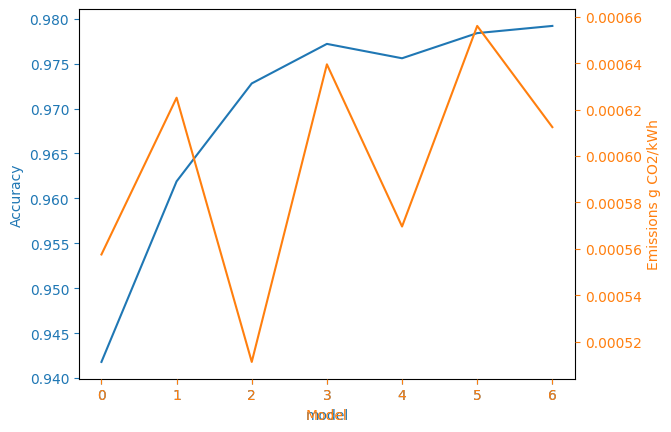

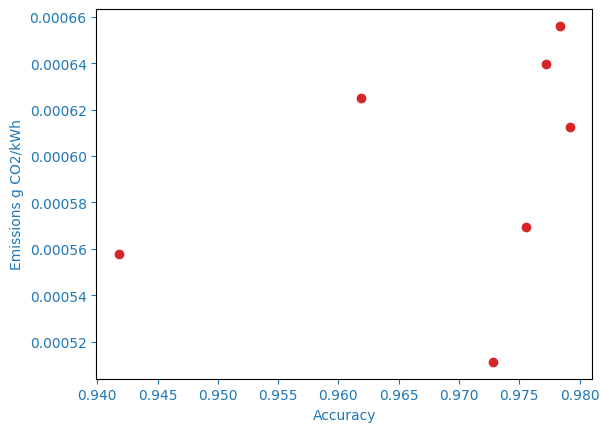

In [ ]:
import matplotlib.pyplot as plt

accuracy = np.array(accuracy)
emissions = np.array(emissions)
x_values1 = np.arange(len(configs))
y_values1 = accuracy

x_values2 = x_values1
y_values2 = emissions



fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
#ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(x_values1, y_values1, color="C0")
ax.set_xlabel("model", color="C0")
ax.set_ylabel("Accuracy", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.plot(x_values2, y_values2, color="C1")
#ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Model', color="C1")
ax2.set_ylabel('Emissions g CO2/kWh', color="C1")
#ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.show()
x_values3 = accuracy
y_values3 = emissions

fig2=plt.figure()
ax3 = fig2.add_subplot(111, label="3")
ax3.scatter(x_values3, y_values3, color="C3")
ax3.set_xlabel("Accuracy", color="C0")
ax3.set_ylabel("Emissions g CO2/kWh", color="C0")
ax3.tick_params(axis='x', colors="C0")
ax3.tick_params(axis='y', colors="C0")

plt.show()

# The Accuracy-Emissions plot shows the region in the bottom-right corner of highest efficiency
* ## Se for instance
>>  #### A. E. I. Brownlee, J. Adair, S. O. Haraldsson and J. Jabbo, "Exploring the Accuracy – Energy Trade-off in Machine Learning," 2021 IEEE/ACM International Workshop on Genetic Improvement (GI), Madrid, Spain, 2021, pp. 11-18, doi: 10.1109/GI52543.2021.00011.